# Gabor滤波

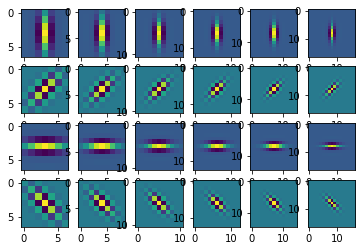

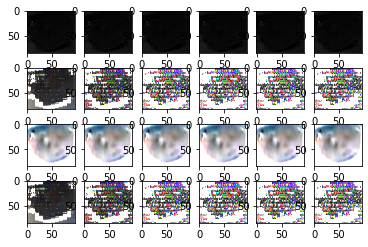

In [3]:
import cv2,os
import numpy as np
import matplotlib.pyplot as plt


def get_img(input_Path):
    img_paths = []
    for (path, dirs, files) in os.walk(input_Path):
        for filename in files:
            if filename.endswith(('.jpg','.png')):
                img_paths.append(path+'/'+filename)
    return img_paths


#构建Gabor滤波器
def build_filters():
    filters = []
    ksize = [7,9,11,13,15,17] # gabor尺度，6个
    lamda = np.pi/2.0         # 波长
    for theta in np.arange(0, np.pi, np.pi / 4): #gabor方向，0°，45°，90°，135°，共四个
        for K in range(6):
            kern = cv2.getGaborKernel((ksize[K], ksize[K]), 1.0, theta, lamda, 0.5, 0, ktype=cv2.CV_32F)
            kern /= 1.5*kern.sum()
            filters.append(kern)
            plt.figure(1)

    #用于绘制滤波器
    for temp in range(len(filters)):
        plt.subplot(4, 6, temp + 1)
        plt.imshow(filters[temp])
    plt.show()
    return filters

#Gabor特征提取
def getGabor(img,filters):
    res = [] #滤波结果
    for i in range(len(filters)):
        # res1 = process(img, filters[i])
        accum = np.zeros_like(img)
        for kern in filters[i]:
            fimg = cv2.filter2D(img, cv2.CV_8UC1, kern)
            accum = np.maximum(accum, fimg, accum)
        res.append(np.asarray(accum))

    #用于绘制滤波效果
    plt.figure(2)
    for temp in range(len(res)):
        plt.subplot(4,6,temp+1)
        plt.imshow(res[temp], cmap='gray' )
    plt.show()
    # return res  #返回滤波结果,结果为24幅图，按照gabor角度排列



img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/eye.jpg")
filters = build_filters()
getGabor(img, filters)


In [5]:

'''
Gabor滤波器参数可视化
参考：https://blog.csdn.net/lhanchao/article/details/55006663
'''

import cv2
import numpy as np
import math

# λ（波长）变化
kernel1 = cv2.getGaborKernel((200,200),10,0,5,0.5,0)
kernel2 = cv2.getGaborKernel((200,200),10,0,10,0.5,0)
kernel3 = cv2.getGaborKernel((200,200),10,0,15,0.5,0)
kernel4 = cv2.getGaborKernel((200,200),10,0,20,0.5,0)

cv2.imshow("lambda: 5", kernel1)
cv2.imshow("lambda: 10", kernel2)
cv2.imshow("lambda: 15", kernel3)
cv2.imshow("lambda: 20", kernel4)

# θ变化
kernel1 = cv2.getGaborKernel((311, 311), 10, 0, 10, 0.5, 0)
kernel2 = cv2.getGaborKernel((311, 311), 10, math.pi * 0.25, 10, 0.5)
kernel3 = cv2.getGaborKernel((311, 311), 10, math.pi * 0.5, 10, 0.5, 0)
kernel4 = cv2.getGaborKernel((311, 311), 10, math.pi * 0.75, 10, 0.5, 0)

cv2.imshow("theta: 0", kernel1)
cv2.imshow("theta: 45", kernel2)
cv2.imshow("theta: 90", kernel3)
cv2.imshow("theta: 135", kernel4)

# ψ的变化

# σ的变化：
kernel1 = cv2.getGaborKernel((311, 311), 5, 0, 10, 0.5, 0)
kernel2 = cv2.getGaborKernel((311, 311), 10, 0, 10, 0.5, 0)
kernel3 = cv2.getGaborKernel((311, 311), 15, 0, 10, 0.5, 0)
kernel4 = cv2.getGaborKernel((311, 311), 20, 0, 10, 0.5, 0)

cv2.imshow("sigma: 5", kernel1)
cv2.imshow("sigma: 10", kernel2)
cv2.imshow("sigma: 15", kernel3)
cv2.imshow("sigma: 20", kernel4)

# γ的变化

kernel1 = cv2.getGaborKernel((200, 200), 10, 0, 10, 0.5, 0)
kernel2 = cv2.getGaborKernel((200, 200), 10, 0, 10, 1.0, 0)
kernel3 = cv2.getGaborKernel((200, 200), 10, 0, 10, 1.5, 0)
kernel4 = cv2.getGaborKernel((200, 200), 10, 0, 10, 2.0, 0)
cv2.imshow("gamma: 0.5", kernel1)
cv2.imshow("gamma: 1.0", kernel2)
cv2.imshow("gamma: 1.5", kernel3)
cv2.imshow("gamma: 2.0", kernel4)

cv2.waitKey()
cv2.destroyAllWindows()


# LBP特征提取

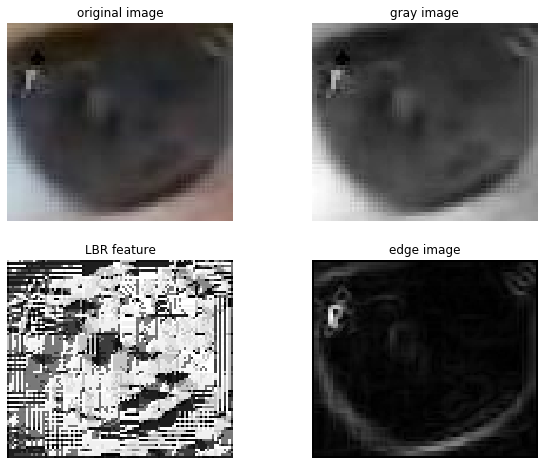

In [10]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data, io,data_dir,filters, feature
from skimage.color import label2rgb
import skimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# settings for LBP
radius = 1  # LBP算法中范围半径的取值
n_points = 8 * radius # 领域像素点数

# 读取图像
image = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/eye.jpg")
#显示到plt中，需要从BGR转化到RGB，若是cv2.imshow(win_name, image)，则不需要转化
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.subplot(221), plt.title("original image"), plt.axis("off")
plt.imshow(image1)

image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.subplot(222), plt.title("gray image"), plt.axis("off")
plt.imshow(image, plt.cm.gray)

'''LBR process'''
lbp = local_binary_pattern(image, n_points, radius)
plt.subplot(223), plt.title("LBR feature"), plt.axis("off")
plt.imshow(lbp, plt.cm.gray)

'''edge'''
edges = filters.sobel(image)
plt.subplot(224), plt.title("edge image"), plt.axis("off")
plt.imshow(edges, plt.cm.gray)
plt.show()